In [419]:
from random import randint
import matplotlib.pyplot as plt
import time
import math as mth
import numpy as np

In [493]:
def Partition(A, p, r, rand = False):
    
    if rand == True:
        ind = randint(p, r)
        A[ind], A[r] = A[r], A[ind]
        
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[j], A[i] = A[i], A[j]
    A[r], A[i + 1] = A[i + 1], A[r]
    return i + 1

def Quicksort(A, p, r, rand = False, k = 0):
    if p < r:
        if r - p + 1 < k:
            return
        q = Partition(A, p, r, rand)
        Quicksort(A, p, q - 1)
        Quicksort(A, q + 1, r)

        
def Insertion_Sort(A):
    for i in range(1, len(A)):
        for j in range(i):
            if A[i] < A[j]:
                A[i], A[j] = A[j], A[i]
        
def Quick_Insertion_Sort(A, p, r, rand = False, k = 0):
    Quicksort(A, p, r, rand, k)
    Insertion_Sort(A)
    
def Partition2(A, p, r, rand = False):
    
    if rand == True:
        ind = randint(p, r)
        A[ind], A[r] = A[r], A[ind]
        
    x = A[r]
    k = r - 1
    i = p - 1
    j = p
    while j <= k:
        if A[j] < x:
            i += 1
            A[j], A[i] = A[i], A[j]
            j += 1
        elif A[j] == x:
            A[j], A[k] = A[k], A[j]
            k -= 1
        else:
            j += 1
        
    t = i + 1
    q = i + r - k 
    while k < r:
        i += 1
        k += 1
        A[i], A[k] = A[k], A[i]
    
    return t, q

In [494]:
A = [13, 19, 9, 5, 12, 8, 7, 4, 21, 2, 6, 8]
A

[13, 19, 9, 5, 12, 8, 7, 4, 21, 2, 6, 8]

In [498]:
A = [0, 1, 2, 1]
A

[0, 1, 2, 1]

In [496]:
print(Partition2(A, 0, len(A) - 1))
A

(1, 2)


[0, 1, 1, 2]

In [499]:
print(Partition(A, 0, len(A) - 1))
A

2


[0, 1, 1, 2]

In [500]:
N = 100000
t1 = []
t2 = []
tt = time.time()
for n in range(3, N + 1):
    
    array = list(range(n)) + [n // 2]
    start_time = time.time()
    Partition2(array, 0, n)
    time_1 = time.time() - start_time
    
    array = list(range(n)) + [n // 2]
    start_time = time.time()
    Partition(array, 0, n)
    time_2 = time.time() - start_time
    
    t1.append(time_1)
    t2.append(time_2)

print("--- %s seconds ---" % (time.time() - tt))

--- 2559.418126821518 seconds ---


In [502]:
2559/365

7.010958904109589

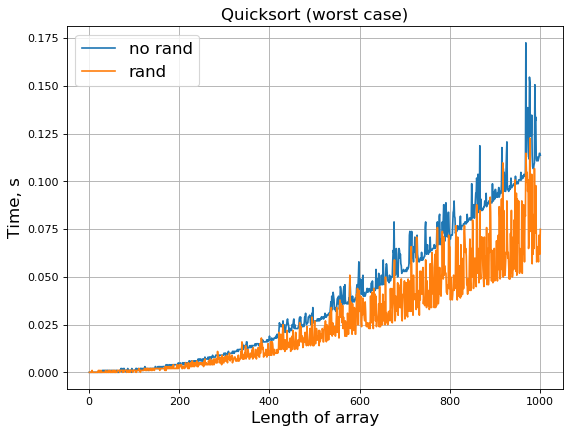

In [193]:
plt.figure(num=None, figsize = (8, 6), dpi = 80)

p1 = plt.plot(range(1, N + 1), t1)
p2 = plt.plot(range(1, N + 1), t2)

plt.title('Quicksort (worst case)', fontsize = 15)
plt.xlabel('Length of array', fontsize = 15)
plt.ylabel('Time, s', fontsize = 15)


plt.grid()
plt.legend((p1[0], p2[0]),('no rand', 'rand'), fontsize = 15)
plt.show()

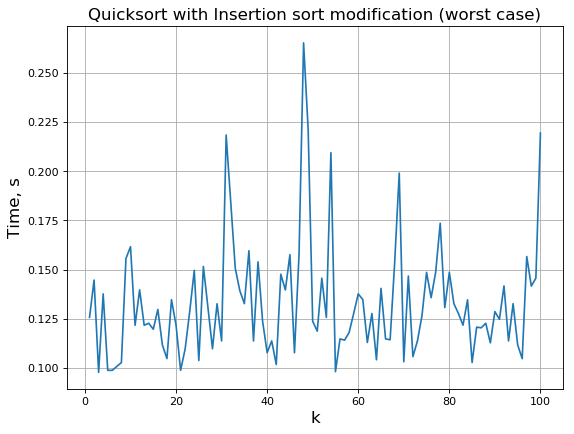

In [224]:
plt.figure(num=None, figsize = (8, 6), dpi = 80)

p1 = plt.plot(range(1, N + 1), t1)

plt.title('Quicksort with Insertion sort modification (worst case)', fontsize = 15)
plt.xlabel('k', fontsize = 15)
plt.ylabel('Time, s', fontsize = 15)


plt.grid()
plt.show()

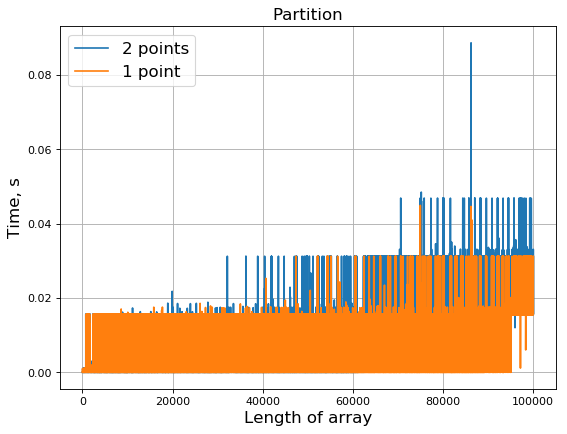

In [507]:
plt.figure(num=None, figsize = (8, 6), dpi = 80)

p1 = plt.plot(range(3, N + 1), t1)
p2 = plt.plot(range(3, N + 1), t2)

plt.title('Partition', fontsize = 15)
plt.xlabel('Length of array', fontsize = 15)
plt.ylabel('Time, s', fontsize = 15)


plt.grid()
plt.legend((p1[0], p2[0]),('2 points', '1 point'), fontsize = 15)
plt.show()